In [11]:
import pyro
import pyro.distributions as dist
import pyro
import torch

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from models_manual_guide import GMM

print(f'running for n_comp = {11}')
pyro.clear_param_store()
svi = GMM(n_comp=11, infr='svi')

In [ ]:
svi.tensor_train.shape

In [ ]:
svi.svi_itr = 1000
los = svi.inference()
svi.plot_svi_convergence(los)

In [ ]:
svi.mcmc = None
svi.generate_stats()

In [ ]:
samps = svi.get_mean_svi_est_manual_guide()
samps

In [ ]:
resps = svi.get_posterior_resp()
resps

In [ ]:
torch.isnan(resps).sum()

In [ ]:
nl_idx = []
for _, i in enumerate(resps):
    if torch.isnan(i).sum():
        nl_idx.append(_)

In [ ]:
svi.tensor_test[1169]

In [ ]:
w = samps['weights']
l = samps['locs']
s = samps['scale']
prob_list = []
lis = []
for i in range(11):
    t = torch.eye(19) * s[i]
    lis.append(t)
f = torch.stack(lis)
distri = dist.MultivariateNormal(l, f)

In [ ]:
for idx in nl_idx:
    d = svi.tensor_test[idx]
    prob = torch.exp(distri.log_prob(d))

    print(f'd: {d}')
    print(f'prob: {prob}')
    numerator = w * prob
    print(f'numerator: {numerator}')            
    denom = numerator.sum()
    print(denom)
    probs = numerator / denom
    print(probs)
    prob_list.append(probs)


#### Running using function

In [44]:
from run_gmm import run_gmm

running for n_comp = 11
Initializing object for inference method svi
size of train tensor: torch.Size([28338, 19])
size of test tensor: torch.Size([11330, 19])
number of iterations 1000
Determining best seed for initialization
Best seed determined after 100 random initializations:
seed = 37, initial_loss = 867599.0
Running SVI iterations

.........
 losses stored in variable loss
posterior samples stored in variable samples with shape 3
posterior probabilities stored in variable resps
Number of nulls in resps: 55
Indexes for test tensor stored in variable nl_idx


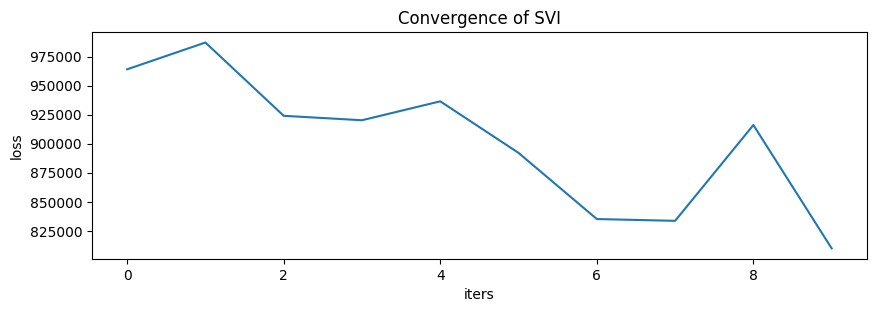

In [45]:
svi = run_gmm()